## URL : 

    _  : https://www.definitions-marketing.com/definition/segmentation-rfm/
    _  : https://www.kaggle.com/code/kautumn06/yellowbrick-clustering-evaluation-examples/notebook
    _  : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
    _  : https://towardsdatascience.com/an-rfm-customer-segmentation-with-python-cf7be647733d
    _  : https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17
    - : https://machinelearningmastery.com/calculate-feature-importance-with-python/

## RFM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option("display.max_column", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", None)
import matplotlib.style
plt.style.use('fast')

In [2]:
data = pd.read_csv('clean_dataset.csv')

In [3]:
# List of categorical features
columns_to_convert_to_categorical = [
    'customer_id',
    'customer_unique_id',
    'customer_city',
    'customer_state',
    'order_id',
    'customer_id',
    'order_status',
    'order_id',
    'product_id',
    'seller_id',
    'order_id',
    'payment_type',
    'review_id',
    'order_id',
    'product_id',
    'product_category_name',
    'seller_id',
    'product_category_name'
]

In [4]:
# List of columns to convert to datetime
columns_to_convert_to_datetime = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp']

# Converting dtype to datetime features
for column_name in columns_to_convert_to_datetime:
    data[column_name] = data[column_name].astype('datetime64[ns]')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     119143 non-null  int64         
 1   order_id                       119143 non-null  object        
 2   customer_id                    119143 non-null  object        
 3   order_status                   119143 non-null  object        
 4   order_purchase_timestamp       119143 non-null  datetime64[ns]
 5   order_approved_at              118966 non-null  datetime64[ns]
 6   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 7   order_delivered_customer_date  115722 non-null  datetime64[ns]
 8   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 9   review_id                      118146 non-null  object        
 10  review_score                   118146 non-null  float64       
 11  

In [6]:
data = data.drop(columns=['Unnamed: 0'])

In [7]:
df_missing = data.isna().sum().sort_values()/len(data)*100
df_missing

order_id                         0.000000
purchase_year                    0.000000
customer_state                   0.000000
customer_city                    0.000000
customer_unique_id               0.000000
order_estimated_delivery_date    0.000000
purchase_month                   0.000000
customer_id                      0.000000
order_purchase_timestamp         0.000000
order_status                     0.000000
payment_value                    0.002518
payment_sequential               0.002518
payment_installments             0.002518
payment_type                     0.005036
approval_time                    0.148561
estimated_delivery_time          0.148561
order_approved_at                0.148561
geolocation_city                 0.271103
customer_lat                     0.271103
customer_lng                     0.271103
geolocation_state                0.271103
geolocation_zip_code_prefix      0.271103
shipping_limit_date              0.699160
price                            0

In [8]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,geolocation_zip_code_prefix,customer_lat,customer_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,volume,delivery_time,estimated_delivery_time,approval_time,purchase_year,purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1976.0,8.429144,15.536632,0.007431,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1976.0,8.429144,15.536632,0.007431,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1976.0,8.429144,15.536632,0.007431,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,4.776599,3.125005,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,4693.0,12.502292,17.858021,1.279745,2018,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,5.074549,2.955951,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,9576.0,9.382708,26.628206,0.011505,2018,8


In [9]:
#data.loc[:, ['customer_unique_id', "order_id"]]

In [10]:
data['order_id']

0         e481f51cbdc54678b7cc49136f2d6af7
1         e481f51cbdc54678b7cc49136f2d6af7
2         e481f51cbdc54678b7cc49136f2d6af7
3         53cdb2fc8bc7dce0b6741e2150273451
4         47770eb9100c2d0c44946d9cf07ec65d
                        ...               
119138    63943bddc261676b46f01ca7ac2f7bd8
119139    83c1379a015df1e13d02aae0204711ab
119140    11c177c8e97725db2631073c19f07b62
119141    11c177c8e97725db2631073c19f07b62
119142    66dea50a8b16d9b4dee7af250b4be1a5
Name: order_id, Length: 119143, dtype: object

In [11]:
data["customer_unique_id"]

0         7c396fd4830fd04220f754e42b4e5bff
1         7c396fd4830fd04220f754e42b4e5bff
2         7c396fd4830fd04220f754e42b4e5bff
3         af07308b275d755c9edb36a90c618231
4         3a653a41f6f9fc3d2a113cf8398680e8
                        ...               
119138    da62f9e57a76d978d02ab5362c509660
119139    737520a9aad80b3fbbdad19b66b37b30
119140    5097a5312c8b157bb7be58ae360ef43c
119141    5097a5312c8b157bb7be58ae360ef43c
119142    60350aa974b26ff12caad89e55993bd6
Name: customer_unique_id, Length: 119143, dtype: object

In [12]:
data['payment_value']

0          18.12
1           2.00
2          18.59
3         141.46
4         179.12
           ...  
119138    195.00
119139    271.01
119140    441.16
119141    441.16
119142     86.86
Name: payment_value, Length: 119143, dtype: float64

In [13]:
data.set_index('customer_unique_id', inplace=True)

In [14]:
now = data['order_purchase_timestamp'].max()

In [15]:
rfm = data.groupby(['customer_unique_id']).agg({
        'order_purchase_timestamp': lambda x: (now - x.max()).days,
        'order_id':'count',
        'payment_value':'sum'})
    
rfm.rename(columns={'order_purchase_timestamp': 'RecencyScore',
                        'order_id': 'FrequencyScore',
                        'payment_value': 'MonetaryScore'}, inplace=True)

In [16]:
rfm['FrequencyScore'] = rfm['FrequencyScore'][rfm['FrequencyScore'] > 0]
rfm['FrequencyScore'] = np.log(rfm['FrequencyScore'])

In [17]:
rfm['MonetaryScore'] = rfm['MonetaryScore'][rfm['MonetaryScore'] > 0]
rfm['MonetaryScore'] = np.log(rfm['MonetaryScore'])

In [18]:
rfm['MonetaryScore']

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    4.955123
0000b849f77a49e4a4ce2b2a4ca5be3f    3.302849
0000f46a3911fa3c0805444483337064    4.456902
0000f6ccb0745a6a4b88665a16c9f078    3.775516
0004aac84e0df4da2b147fca70cf8255    5.282645
                                      ...   
fffcf5a5ff07b0908bd4e2dbc735a684    8.327204
fffea47cd6d3cc0a88bd621562a9d061    4.437698
ffff371b4d645b6ecea244b27531430a    4.722598
ffff5962728ec6157033ef9805bacc48    4.895524
ffffd2657e2aad2907e67c3e9daecbeb    4.270536
Name: MonetaryScore, Length: 96096, dtype: float64

Récupération de l'identifiant, de la date et de la valeur de chaque commande. Après jointure sur l'identifiant client on peut calculer les variables RFM

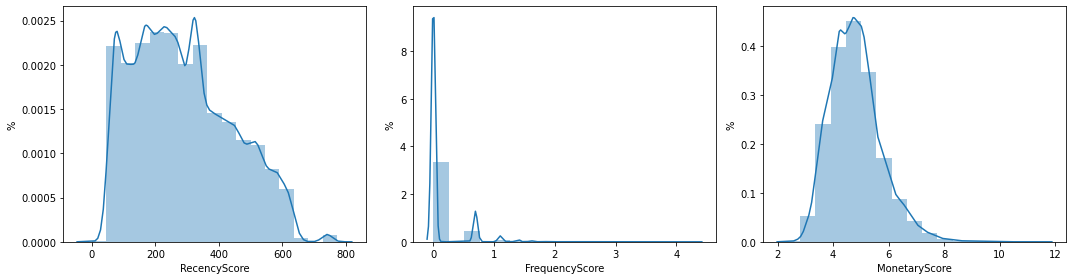

In [19]:
fig = plt.figure(1, figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.distplot(rfm.RecencyScore, label='Recency Score',
                 bins=int(1 + np.log2(len(rfm))))
plt.ylabel("%")

plt.subplot(1, 3, 2)
sns.distplot(rfm.FrequencyScore, label='Frequency Score',
                 bins=int(1 + np.log2(len(rfm))))
plt.ylabel("%")

plt.subplot(1, 3, 3)
sns.distplot(rfm.MonetaryScore, label='Monetary Score',
                 bins=int(1 + np.log2(len(rfm))))
plt.ylabel("%")
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

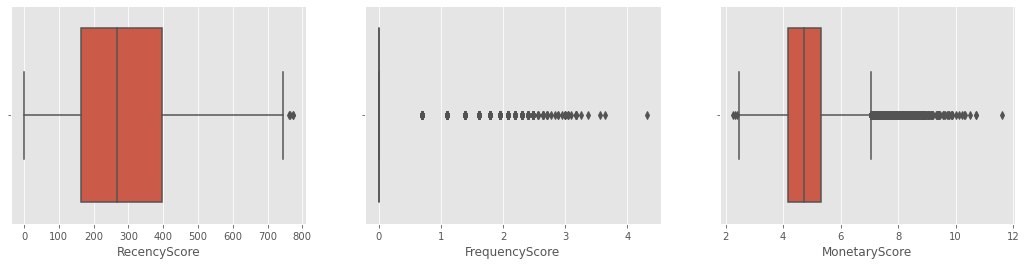

In [20]:
fig = plt.figure(1, figsize=(18, 4))

plt.subplot(131)
sns.boxplot(rfm["RecencyScore"])

plt.subplot(132)
sns.boxplot(rfm["FrequencyScore"])

plt.subplot(133)
sns.boxplot(rfm["MonetaryScore"])
plt.show()

In [21]:
rfm.describe()

,RecencyScore,FrequencyScore,MonetaryScore
count,96096.000000,96096.000000,96093.000000
mean,287.735691,0.131395,4.805777
std,153.414676,0.339076,0.918514
min,0.000000,0.000000,2.260721
25%,163.000000,0.000000,4.158883
50%,268.000000,0.000000,4.730392
75%,397.000000,0.000000,5.315322
max,772.000000,4.317488,11.601967


In [22]:
rfm.head(5)

,RecencyScore,FrequencyScore,MonetaryScore
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,0.0,4.955123
0000b849f77a49e4a4ce2b2a4ca5be3f,163,0.0,3.302849
0000f46a3911fa3c0805444483337064,585,0.0,4.456902
0000f6ccb0745a6a4b88665a16c9f078,369,0.0,3.775516
0004aac84e0df4da2b147fca70cf8255,336,0.0,5.282645


In [23]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecencyScore    96096 non-null  int64  
 1   FrequencyScore  96096 non-null  float64
 2   MonetaryScore   96093 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 4.9+ MB


##  Features clustering

Le datset est aggrégé par clients unique. Les variables catégorielles ne peuvent pas être aggrégés, on va les supprimer

In [24]:
# Create shipping_time variable
data['shipping_time'] = data['shipping_limit_date'] \
    - data['order_delivered_carrier_date']
data['shipping_time'] = data['shipping_time'] \
    .dt.total_seconds() / 86400

# Create review_delay variable 
data['review_delay'] = data['review_creation_date'] \
    - data['order_purchase_timestamp']
data['review_delay'] = data['review_delay'] \
    .dt.total_seconds() / 86400

# Create review_answer_delay variable 
data['review_answer_delay'] = data['review_answer_timestamp'] \
    - data['review_creation_date']
data['review_answer_delay'] = data['review_answer_delay'] \
    .dt.total_seconds() / 86400

In [25]:
# Features to aggregate
features = ['review_creation_date',
            'review_answer_timestamp',
            'estimated_delivery_time',
            'delivery_time',
            'approval_time',
            'purchase_year',
            'purchase_month',
            'order_purchase_timestamp',
            'payment_sequential',
            'freight_value',
            'price',
            'payment_value',
            'order_item_id',
            'product_weight_g',
            'product_photos_qty',
            'product_name_lenght',
            'volume',
            'shipping_limit_date',
            'order_delivered_carrier_date',
            'shipping_time',
            'review_delay',
            'review_answer_delay'
           ]

In [26]:
model = data.groupby('customer_unique_id').agg({'review_creation_date': "mean",
                                                         'review_answer_timestamp': "mean",
                                                         'estimated_delivery_time': "mean",
                                                         'delivery_time': 'mean',
                                                         'approval_time': 'mean',
                                                         'purchase_year': 'mean',
                                                         'purchase_month': 'mean',
                                                         'order_purchase_timestamp': 'mean',
                                                         'payment_sequential': "sum",
                                                         'freight_value': "sum",
                                                         'price': 'sum',
                                                         'payment_value': "sum",
                                                         'order_item_id': 'sum',
                                                         'product_weight_g': "mean",
                                                         'product_photos_qty': 'mean',
                                                         'product_name_lenght': 'mean',
                                                         'volume': "mean",
                                                         'shipping_limit_date': "mean",
                                                         'order_delivered_carrier_date': "mean",
                                                         'shipping_time':"mean",
                                                         'review_delay':"mean",
                                                         'review_answer_delay':"mean",
                                                        })

In [27]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   review_creation_date          95380 non-null  datetime64[ns]
 1   review_answer_timestamp       95380 non-null  datetime64[ns]
 2   estimated_delivery_time       95997 non-null  float64       
 3   delivery_time                 93343 non-null  float64       
 4   approval_time                 95997 non-null  float64       
 5   purchase_year                 96096 non-null  float64       
 6   purchase_month                96096 non-null  float64       
 7   order_purchase_timestamp      96096 non-null  datetime64[ns]
 8   payment_sequential            96096 non-null  float64       
 9   freight_value                 96096 non-null  float64       
 10  price                         96096 non-n

In [28]:
model.columns = features

In [29]:
#model = model.join(rfm[['RecencyScore','FrequencyScore','MonetaryScore']])

In [30]:
model.head()

,review_creation_date,review_answer_timestamp,estimated_delivery_time,delivery_time,approval_time,purchase_year,purchase_month,order_purchase_timestamp,payment_sequential,freight_value,price,payment_value,order_item_id,product_weight_g,product_photos_qty,product_name_lenght,volume,shipping_limit_date,order_delivered_carrier_date,shipping_time,review_delay,review_answer_delay
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-17,2018-05-21 13:44:48,10.533819,6.400914,0.010313,2018.0,5.0,2018-05-10 10:56:27,1.0,2.484907,4.866765,141.90,1.0,1500.0,1.0,60.0,7616.0,2018-05-15 11:11:18,2018-05-12 08:18:00,3.120347,6.544132,4.572778
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-11,2018-05-11 22:29:25,7.232130,2.984005,0.301586,2018.0,5.0,2018-05-07 11:11:27,1.0,2.115050,2.939162,27.19,1.0,375.0,1.0,56.0,5148.0,2018-05-11 17:56:33,2018-05-09 12:18:00,2.235104,3.533715,0.937095
0000f46a3911fa3c0805444483337064,2017-04-06,2017-04-07 01:19:44,27.121493,25.731759,0.000000,2017.0,3.0,2017-03-10 21:05:03,1.0,2.846071,4.234107,86.22,1.0,1500.0,3.0,49.0,43750.0,2017-03-15 21:05:03,2017-03-13 12:58:30,2.337882,26.121493,1.055370
0000f6ccb0745a6a4b88665a16c9f078,2017-11-02,2017-11-03 00:17:51,31.132442,20.023472,0.013611,2017.0,10.0,2017-10-12 20:29:41,1.0,2.869602,3.257712,43.62,1.0,150.0,5.0,43.0,1045.0,2017-10-18 21:49:17,2017-10-13 20:08:19,5.070116,20.146053,1.012396
0004aac84e0df4da2b147fca70cf8255,2017-11-28,2017-12-02 22:29:35,20.161898,13.126435,0.014699,2017.0,11.0,2017-11-14 19:45:42,1.0,2.826722,5.192957,196.89,1.0,6050.0,3.0,58.0,528.0,2017-11-22 20:06:52,2017-11-16 19:52:10,6.010208,13.176597,4.937211


In [31]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   review_creation_date          95380 non-null  datetime64[ns]
 1   review_answer_timestamp       95380 non-null  datetime64[ns]
 2   estimated_delivery_time       95997 non-null  float64       
 3   delivery_time                 93343 non-null  float64       
 4   approval_time                 95997 non-null  float64       
 5   purchase_year                 96096 non-null  float64       
 6   purchase_month                96096 non-null  float64       
 7   order_purchase_timestamp      96096 non-null  datetime64[ns]
 8   payment_sequential            96096 non-null  float64       
 9   freight_value                 96096 non-null  float64       
 10  price                         96096 non-n

In [32]:
# percentage of nan for each column of data
df_missing = model.isna().sum().sort_values()/len(data)*100
df_missing

price                           0.000000
purchase_year                   0.000000
purchase_month                  0.000000
order_purchase_timestamp        0.000000
payment_sequential              0.000000
freight_value                   0.000000
payment_value                   0.000000
order_item_id                   0.000000
estimated_delivery_time         0.083093
approval_time                   0.083093
shipping_limit_date             0.567385
volume                          0.578297
product_weight_g                0.578297
review_creation_date            0.600959
review_answer_timestamp         0.600959
review_delay                    0.600959
review_answer_delay             0.600959
order_delivered_carrier_date    1.368104
shipping_time                   1.368943
product_photos_qty              1.668583
product_name_lenght             1.668583
delivery_time                   2.310669
dtype: float64

In [33]:
sample = model.join(rfm[['RecencyScore','FrequencyScore','MonetaryScore']])

In [34]:
sample

,review_creation_date,review_answer_timestamp,estimated_delivery_time,delivery_time,approval_time,purchase_year,purchase_month,order_purchase_timestamp,payment_sequential,freight_value,price,payment_value,order_item_id,product_weight_g,product_photos_qty,product_name_lenght,volume,shipping_limit_date,order_delivered_carrier_date,shipping_time,review_delay,review_answer_delay,RecencyScore,FrequencyScore,MonetaryScore
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-17,2018-05-21 13:44:48,10.533819,6.400914,0.010313,2018.0,5.0,2018-05-10 10:56:27,1.0,2.484907,4.866765,141.90,1.0,1500.0,1.0,60.0,7616.0,2018-05-15 11:11:18,2018-05-12 08:18:00,3.120347,6.544132,4.572778,160,0.000000,4.955123
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-11,2018-05-11 22:29:25,7.232130,2.984005,0.301586,2018.0,5.0,2018-05-07 11:11:27,1.0,2.115050,2.939162,27.19,1.0,375.0,1.0,56.0,5148.0,2018-05-11 17:56:33,2018-05-09 12:18:00,2.235104,3.533715,0.937095,163,0.000000,3.302849
0000f46a3911fa3c0805444483337064,2017-04-06,2017-04-07 01:19:44,27.121493,25.731759,0.000000,2017.0,3.0,2017-03-10 21:05:03,1.0,2.846071,4.234107,86.22,1.0,1500.0,3.0,49.0,43750.0,2017-03-15 21:05:03,2017-03-13 12:58:30,2.337882,26.121493,1.055370,585,0.000000,4.456902
0000f6ccb0745a6a4b88665a16c9f078,2017-11-02,2017-11-03 00:17:51,31.132442,20.023472,0.013611,2017.0,10.0,2017-10-12 20:29:41,1.0,2.869602,3.257712,43.62,1.0,150.0,5.0,43.0,1045.0,2017-10-18 21:49:17,2017-10-13 20:08:19,5.070116,20.146053,1.012396,369,0.000000,3.775516
0004aac84e0df4da2b147fca70cf8255,2017-11-28,2017-12-02 22:29:35,20.161898,13.126435,0.014699,2017.0,11.0,2017-11-14 19:45:42,1.0,2.826722,5.192957,196.89,1.0,6050.0,3.0,58.0,528.0,2017-11-22 20:06:52,2017-11-16 19:52:10,6.010208,13.176597,4.937211,336,0.000000,5.282645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-07-07,2017-07-11 11:20:05,54.114398,27.504676,0.010185,2017.0,6.0,2017-06-08 21:00:36,2.0,11.031093,13.313314,4134.84,3.0,30000.0,1.0,54.0,251625.0,2017-06-25 21:15:16,2017-06-23 13:03:27,2.341539,28.124583,4.472280,495,0.693147,8.327204
fffea47cd6d3cc0a88bd621562a9d061,2018-01-10,2018-01-15 11:51:59,32.155324,30.091667,0.005833,2017.0,12.0,2017-12-10 20:07:56,1.0,2.980111,4.172694,84.58,1.0,1720.0,2.0,37.0,32076.0,2017-12-14 20:16:20,2017-12-21 16:27:01,-6.840752,30.161157,5.494433,310,0.000000,4.437698
ffff371b4d645b6ecea244b27531430a,2017-02-23,2017-02-25 15:03:21,44.331435,14.862731,0.009352,2017.0,2.0,2017-02-07 15:49:16,1.0,3.116178,4.498698,112.46,1.0,600.0,5.0,57.0,3315.0,2017-02-11 15:49:16,2017-02-08 10:04:37,3.239340,15.340787,2.627326,617,0.000000,4.722598


## Echantillonnage

In [35]:
# 5% selection of a sample 
sample = rfm.sample(frac=1)

In [36]:
sample.head(50)

,RecencyScore,FrequencyScore,MonetaryScore
customer_unique_id,,,
d0af5dec42f3bf160195f5bcb704fd01,412,0.693147,3.672242
abf60c6ebc739e6f4e4319a9044073af,323,0.000000,5.496348
4d50764ac486be215e204a03f2ab11c8,271,0.000000,5.057073
67f5420469ecf30af33c56afc4c82c68,288,0.000000,3.637849
e5d380f1cd5c220fdab47e0245471013,501,0.000000,4.667018
eca61ae704cc5ecddd7a6e558b6f04b1,200,1.098612,8.099585
49c6b1ee895e59043bcd5e2135f08355,145,0.693147,5.394899
adddad3f8f29debdcafc57d768c540ac,490,0.000000,6.496202
7c50190d7200a712b3efbf74dcda62a9,132,0.000000,4.123580


In [37]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, d0af5dec42f3bf160195f5bcb704fd01 to ec21b84d6332db46075bfb851000c59f
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecencyScore    96096 non-null  int64  
 1   FrequencyScore  96096 non-null  float64
 2   MonetaryScore   96093 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.9+ MB


## Imputers, transformers and pipeline

In [38]:
# Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


# Transformers
from sklearn.decomposition import PCA
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

In [39]:
# Separation into numerical and categorical features
numerical_features = sample.select_dtypes(include=['int64', 'float64']).columns
categorical_features = sample.select_dtypes(include=['object', 'bool']).columns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(sample)
total_explained_variance = pca.explained_variance_ratio_.cumsum()

In [40]:


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    #('PCA', PCA(n_components=3)),
    #('std_scaler', RobustScaler()),
    #('std_scaler', MinMaxScaler()),
    #('QuantileTransformer', QuantileTransformer()),
])

In [41]:
preprocessing_pipeline = Pipeline(steps=[('numerical_transformer', numerical_transformer)])

In [42]:
index = sample.index
print(index)

Index(['d0af5dec42f3bf160195f5bcb704fd01', 'abf60c6ebc739e6f4e4319a9044073af',
       '4d50764ac486be215e204a03f2ab11c8', '67f5420469ecf30af33c56afc4c82c68',
       'e5d380f1cd5c220fdab47e0245471013', 'eca61ae704cc5ecddd7a6e558b6f04b1',
       '49c6b1ee895e59043bcd5e2135f08355', 'adddad3f8f29debdcafc57d768c540ac',
       '7c50190d7200a712b3efbf74dcda62a9', 'ae86daa72f710105fb92e3843e356425',
       ...
       '01ad914ceb44eddfbf992570e6a5ef49', '3773db65dcc8cdff919dc782fa179380',
       '420be7d41ee4292cb55d2616584b28f9', 'd5dea31916765489154e0f82c3e66bf7',
       '1ae6159fb2d716e145ebaaa0224f0b46', '91a2d741f9510c7afbdcaa8b10c0050f',
       'ad2bbf8d4d2af0537f9f5ff6f3ad8192', '38f700a297fe5d479187e8df810e5f66',
       '0711ee90de545cb9be5c470614ad976b', 'ec21b84d6332db46075bfb851000c59f'],
      dtype='object', name='customer_unique_id', length=96096)


In [43]:
columns = sample.columns
print(columns)

Index(['RecencyScore', 'FrequencyScore', 'MonetaryScore'], dtype='object')


In [44]:
sample.iloc[:,0]

customer_unique_id
d0af5dec42f3bf160195f5bcb704fd01    412
abf60c6ebc739e6f4e4319a9044073af    323
4d50764ac486be215e204a03f2ab11c8    271
67f5420469ecf30af33c56afc4c82c68    288
e5d380f1cd5c220fdab47e0245471013    501
                                   ... 
91a2d741f9510c7afbdcaa8b10c0050f    385
ad2bbf8d4d2af0537f9f5ff6f3ad8192    128
38f700a297fe5d479187e8df810e5f66    205
0711ee90de545cb9be5c470614ad976b    313
ec21b84d6332db46075bfb851000c59f    490
Name: RecencyScore, Length: 96096, dtype: int64

In [45]:
sample.iloc[:,1]

customer_unique_id
d0af5dec42f3bf160195f5bcb704fd01    0.693147
abf60c6ebc739e6f4e4319a9044073af    0.000000
4d50764ac486be215e204a03f2ab11c8    0.000000
67f5420469ecf30af33c56afc4c82c68    0.000000
e5d380f1cd5c220fdab47e0245471013    0.000000
                                      ...   
91a2d741f9510c7afbdcaa8b10c0050f    0.000000
ad2bbf8d4d2af0537f9f5ff6f3ad8192    0.000000
38f700a297fe5d479187e8df810e5f66    0.693147
0711ee90de545cb9be5c470614ad976b    0.000000
ec21b84d6332db46075bfb851000c59f    0.000000
Name: FrequencyScore, Length: 96096, dtype: float64

In [46]:
sample.iloc[:,2]

customer_unique_id
d0af5dec42f3bf160195f5bcb704fd01    3.672242
abf60c6ebc739e6f4e4319a9044073af    5.496348
4d50764ac486be215e204a03f2ab11c8    5.057073
67f5420469ecf30af33c56afc4c82c68    3.637849
e5d380f1cd5c220fdab47e0245471013    4.667018
                                      ...   
91a2d741f9510c7afbdcaa8b10c0050f    4.144721
ad2bbf8d4d2af0537f9f5ff6f3ad8192    3.253857
38f700a297fe5d479187e8df810e5f66    5.586949
0711ee90de545cb9be5c470614ad976b    4.798432
ec21b84d6332db46075bfb851000c59f    4.219802
Name: MonetaryScore, Length: 96096, dtype: float64

In [47]:
sample_scaled = preprocessing_pipeline.fit_transform(sample)
#sample_scaled = pd.DataFrame(sample_scaled, index = sample.index)
#sample_scaled = pd.DataFrame(sample_scaled,  index = sample.index, columns = sample.columns)

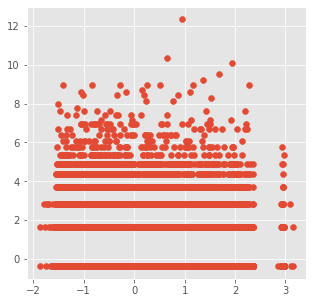

In [48]:
fig=plt.figure(figsize=(5,5))
plt.scatter(sample_scaled[:,0], sample_scaled[:,1])

In [49]:
sample_scaled.shape

(96096, 3)

In [50]:
#print(sample_scaled)

In [51]:
sample_scaled[:,0].shape

(96096,)

In [52]:
sample_scaled[:,1].shape

(96096,)

##  Métriques de Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

sse, slc, db = {}, {}, {}
for i in range(2, 7):
    kmeans = KMeans(init='k-means++', n_clusters=i, random_state=10, max_iter=400, n_init=50).fit(sample_scaled)
    clusters = kmeans.labels_
    sse[i] = kmeans.inertia_
    slc[i] = silhouette_score(sample_scaled,clusters)
    db[i] = davies_bouldin_score(sample_scaled,clusters)

In [ ]:
# Graphs for each metric

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (25, 5))

ax0.plot(list(sse.keys()), list(sse.values()), color="blue", marker='o')
ax0.set_xlabel("number of cluster")
ax0.set_ylabel("inertia")

ax1.plot(list(slc.keys()), list(slc.values()), color="gold", marker='o')
ax1.set_xlabel("number of cluster")
ax1.set_ylabel("silhouette score")

ax2.plot(list(db.keys()), list(db.values()), color="red", marker='o')
ax2.set_xlabel("Number of cluster")
ax2.set_ylabel("Davies-Bouldin score")

## Kmeans et graphs TSNE

In [ ]:


from sklearn.manifold import TSNE
import matplotlib.cm as cm
n_clusters=4

sample_scaled = preprocessing_pipeline.fit_transform(sample)
fig, ax2 = plt.subplots(1)
fig.set_size_inches(10, 10)


clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=400, n_init=50)
cluster_labels = clusterer.fit_predict(sample_scaled)
labels_scale = clusterer.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
    
silhouette_avg = silhouette_score(sample_scaled, cluster_labels)
print("for n clusters =", n_clusters, "average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(sample_scaled, cluster_labels)

# 2nd Plot showing the actual clusters formed


reducer1=TSNE(n_components=2)
data_reduced1 = reducer1.fit_transform(sample_scaled)


sns.scatterplot(data_reduced1[:,0], data_reduced1[:,1], palette='deep', hue=cluster_labels, legend="full",alpha=0.7,ax=ax2)


ax2.set_title("clustered data")
ax2.set_xlabel("feature space for 1st feature")
ax2.set_ylabel("feature space for 2nd feature")
plt.suptitle(("TSNE for KMeans clustering"
                  "with n clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Définitiondu dataframe preprocessed
sample_scaled = preprocessing_pipeline.fit_transform(sample)
df_sample_scaled = pd.DataFrame(sample_scaled,
                                 index=sample.index,
                                 columns=sample.columns)


n_clusters=4

clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=400, n_init=50)
cluster_labels = clusterer.fit_predict(sample_scaled)
labels_scale = clusterer.labels_

# Dataframe of identified clusters
df_cluster_labels = pd.DataFrame(labels_scale, index = df_sample_scaled.index)
df_cluster_labels.columns = ['cluster_labels']

In [ ]:
# Distribution of clients in clusters
sample_clustered = df_sample_scaled.join(df_cluster_labels)
sample_clustered['cluster_labels'].value_counts(normalize=True).sort_index().plot.bar(figsize=(9, 4))

In [ ]:
# Distribution of clients in clusters
sample_clustered['cluster_labels'].value_counts().sort_index()/len(sample_clustered)*100

In [ ]:
df_test = sample_clustered.groupby(['cluster_labels']).agg({
        'RecencyScore': 'size',
        'FrequencyScore':'size',
        'MonetaryScore':'size'})

In [ ]:
df_test.sort_index().plot.bar(figsize=(9, 4))

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
import matplotlib.cm as cm


sample_scaled = preprocessing_pipeline.fit_transform(sample)
fig, ax2 = plt.subplots(1)
fig.set_size_inches(10, 10)


# Compute DBSCAN
db = DBSCAN(eps=0.05, min_samples=10).fit(sample_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# 2nd Plot showing the actual clusters formed


reducer1=TSNE(n_components=2)
data_reduced1 = reducer1.fit_transform(sample_scaled)

sns.scatterplot(data_reduced1[:,0], data_reduced1[:,1], palette='deep', hue=labels, legend="full",alpha=0.7,ax=ax2)


ax2.set_title("clustered data")
ax2.set_xlabel("feature space for 1st feature")
ax2.set_ylabel("feature space for 2nd feature")
plt.suptitle("TSNE for DBSCAN", fontsize=14, fontweight='bold')

plt.show()

# variables latentes des données et partitionnement avec un classifier

In [ ]:
# Définitiondu dataframe preprocessed
sample_imputed = preprocessing_pipeline.fit_transform(sample)
df_sample_imputed = pd.DataFrame(sample_imputed,
                                 index=sample.index,
                                 columns=sample.columns)

In [ ]:
sample_scaled = preprocessing_pipeline.fit_transform(sample)
sample_scaled = pd.DataFrame(sample_scaled,  index = sample.index, columns = sample.columns)
n_clusters=4

clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=400, n_init=50)
cluster_labels = clusterer.fit_predict(sample_scaled)
labels_scale = clusterer.labels_

# Dataframe of identified clusters
df_cluster_labels = pd.DataFrame(cluster_labels, index = sample_scaled.index)
df_cluster_labels.columns = ['cluster_labels']

## clustering hiérarchique

In [ ]:
# hierachical clustering for flexibiliy and small ammount of features (<50)
# random forest for feature importance on a classification problem 
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

X, y = df_sample_imputed, df_cluster_labels
# define the model
classeur = RandomForestClassifier()
# fit the model
classeur.fit(X, y)
# get importance
importance = classeur.feature_importances_
df_importance = pd.DataFrame(importance,
                             index=X.columns,
                             )
df_importance = df_importance.rename(columns={0: 'importance'})
df_importance = df_importance.sort_values(by = ['importance'], ascending=False)
# plot feature importance
 # .nlargest(4) # pandas Series method which will return a subset of the series with the largest n values.

sns.barplot(x='importance',
            y=df_importance.index, data=df_importance)

In [ ]:
# Distribution of clients in clusters
sample_clustered['cluster_labels'].value_counts().sort_index()/len(sample_clustered)*100

In [ ]:
# Parallel Coordinates Plots pour la caractérisation des clusters

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = sample_clustered['cluster_labels'],
                   colorscale = [[0,'red'],[0.1,'blue'],[0.2,'yellow'], [0.3,'green'],[0.4,'darkgreen'],
                                 [0.5,'orange'], [0.6,'purple'],[0.7,'lightblue'],[1,'gold']]),
        
        dimensions = list([
            dict(range = [sample_clustered['RecencyScore'].min(),sample_clustered['RecencyScore'].max()],
                 #constraintrange = [100000,150000],
                 label = "RecencyScore", values = sample_clustered['RecencyScore']),
            
            dict(range = [-1,6],
                 tickvals = [0,1,2,3,4,5],
                 label = 'cluster_labels', values = sample_clustered['cluster_labels']),
            
            dict(range = [sample_clustered['FrequencyScore'].min(),sample_clustered['FrequencyScore'].max()],
                 #constraintrange = [100000,150000],
                 label = "FrequencyScore", values = sample_clustered['FrequencyScore']),
            
            dict(range = [sample_clustered['MonetaryScore'].min(),sample_clustered['MonetaryScore'].max()],
                 #constraintrange = [100000,150000],
                 label = "MonetaryScore", values = sample_clustered['MonetaryScore'])])  
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
# Valeurs moyennes par variables et par clusters
column_names = list(sample_clustered.columns)

df_mean = pd.DataFrame(columns = column_names)

for i in range(4):
    df_mean = df_mean.append((pd.DataFrame(sample_clustered[sample_clustered['cluster_labels']==i].mean())).transpose())

In [ ]:
df_mean.head()

In [ ]:
df_mean.info()

In [ ]:
df_mean['MonetaryScore'].min()

In [ ]:
# Parallel Coordinates Plots pour la caractérisation des clusters

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df_mean['cluster_labels'],
                   colorscale = [[0,'red'],[0.1,'blue'],[0.2,'yellow'], [0.3,'green'],[0.4,'darkgreen'],
                                 [0.5,'orange'], [0.6,'purple'],[0.7,'lightblue'],[1,'gold']]),
        
        dimensions = list([
            
            dict(range = [0,4],
                 tickvals = [0,1,2,3],
                 label = 'cluster_labels', values = df_mean['cluster_labels']),
            
            dict(range = [sample_clustered['MonetaryScore'].min(),sample_clustered['MonetaryScore'].max()],
                 label = "MonetaryScore", values = sample_clustered['MonetaryScore'].astype('int64')),
            
            dict(range = [df_mean['FrequencyScore'].min(),df_mean['FrequencyScore'].max()],
                 label = "FrequencyScore", values = df_mean['FrequencyScore'].astype('int64')),
            
            dict(range = [sample_clustered['RecencyScore'].min(),sample_clustered['RecencyScore'].max()],
                 label = "RecencyScore", values = sample_clustered['RecencyScore'].astype('int64'))])

    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

## Stabilité du Kmeans dans le temps

In [ ]:
rfm.head()

In [ ]:
rfm.info()

In [ ]:
sample_scaled = preprocessing_pipeline.fit_transform(rfm)

# transformation into dataframe
df_customer_dataset_reduced = pd.DataFrame(sample_scaled, 
                                    index = rfm.index, 
                                    columns = rfm.columns)

df_customer_dataset_reduced_time = pd.merge(model[['purchase_year', 'purchase_month']], 
                                            df_customer_dataset_reduced, 
                                            left_index=True, right_index=True,  how = 'outer')

In [ ]:
n_clusters=4
clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=400, n_init=50)
cluster_labels = clusterer.fit_predict(sample_scaled)
labels_scale = clusterer.labels_

cluster_labels = clusterer.fit_predict(sample_scaled)
df_cluster_labels = pd.DataFrame(cluster_labels, index = df_customer_dataset_reduced.index)
df_cluster_labels.rename(columns={0: "clusters"}, inplace = True)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
# list of purchase_year and purchase_month
year =  (df_customer_dataset_reduced_time.purchase_year.astype(int).unique()).tolist() 
month =  (df_customer_dataset_reduced_time.purchase_month.astype(int).unique()).tolist()

datasets = []
ari = []

# for each month of each year we extract the corresponding part of the dataset and we store it in a list of monthly datasets
for y in year:
    for m in month:
        data = df_customer_dataset_reduced_time.loc[(df_customer_dataset_reduced_time.purchase_year == y)
                                                    & (df_customer_dataset_reduced_time.purchase_month == m),:]
        datasets.append(data)
        
df_merge = []

# for each element of the monthly dataset list, calculate the ARI score between the labels of a monthly dataset 
# and those of the global dataset for the same period

for k in range(len(datasets)):
    df_merge.append(datasets[k])
    if len(df_merge) == 1 :
        df_final = df_merge[0]
        if len(df_final) >= 4:
            df_final.drop(['purchase_year', 'purchase_month'], axis = 1 , inplace = True)
            clusterer.fit(df_final)
            labels_true = df_cluster_labels.loc[df_final.index, 'clusters'].tolist()
            ari.append(adjusted_rand_score(labels_true, clusterer.labels_))
    else:
        df_final = pd.concat(df_merge)
        if len(df_final) >= 4:
            df_final.drop(['purchase_year', 'purchase_month'], axis = 1 , inplace = True)
            clusterer.fit(df_final)
            labels_true = df_cluster_labels.loc[df_final.index, 'clusters'].tolist()
            ari.append(adjusted_rand_score(labels_true, clusterer.labels_))

ari.reverse()

#plot of results
fig = plt.figure(figsize=(16, 4))
plt.plot(range(len(ari)), ari, marker='o')
plt.xlabel('nombre de mois')
plt.ylabel('indice ARI')